In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

This datset contains 1338 rows and 7 columns

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


In [6]:

df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# Converting  categorical features to numerical

In [9]:
df['sex'].replace({'male' : 0 , 'female' : 1},inplace=True )
df['smoker'].replace({'no': 0 , 'yes' : 1},inplace=True)
df['region'].replace({'northwest':0, 'northeast':1,'southeast':2,'southwest':3},inplace=True)
               



In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


# Statestical summary of data

This Dataset contains two data types(int 64 and float64)

In [13]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


1.This gives the statistical summary of numerical columns.
The summary of the dataset looks perfect since there is no negative or invalid values are present.
2.In this dataset count of all columns are same,which means there is no missing values are present. 
3.The median(50%) is greater than mean which means skewness is preset 
4.By summarizing the data there is less diff between 75% and max Which means not muchoutliers are present.

<Axes: >

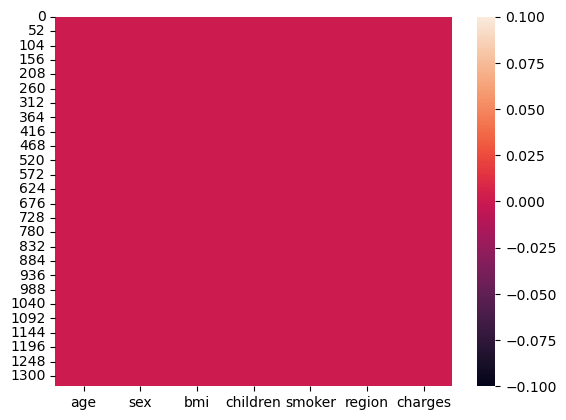

In [14]:
sns.heatmap(df.isnull())

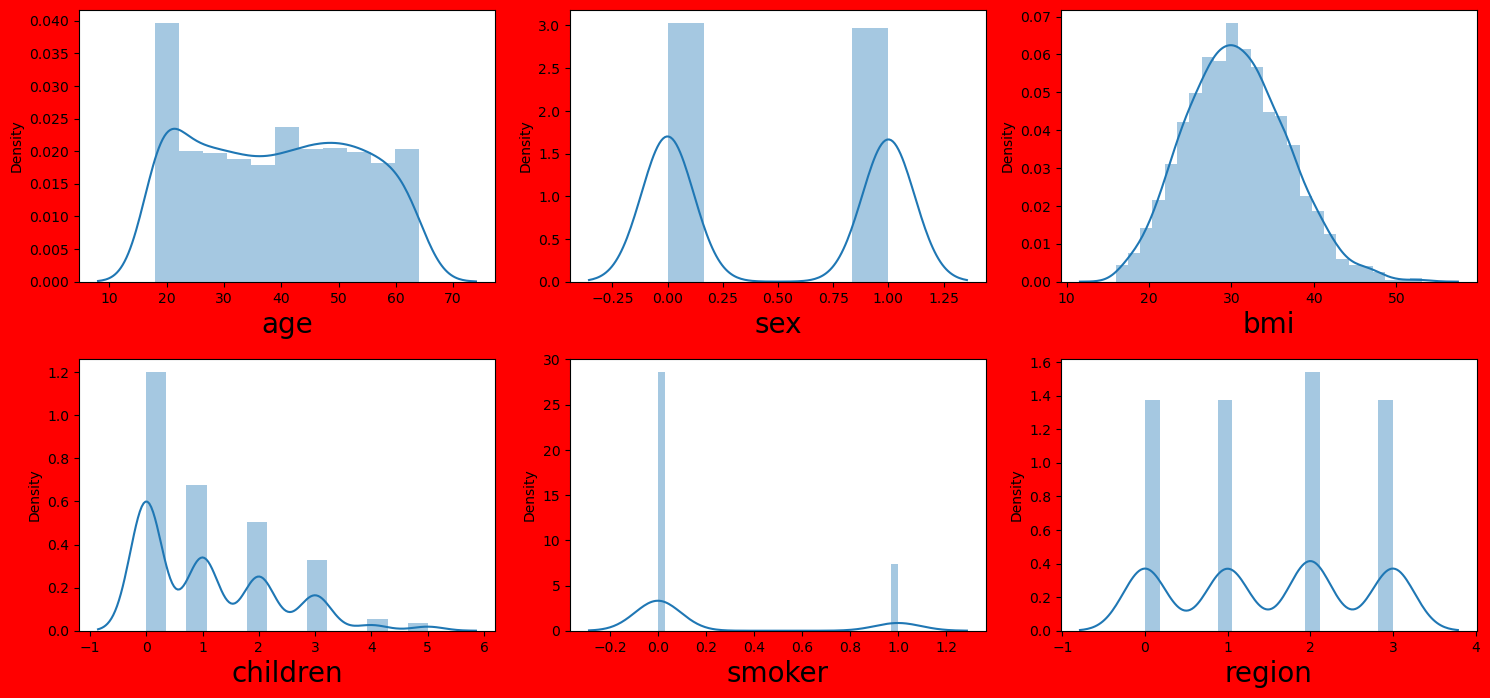

In [15]:
#Lets see how data is distributed for every column
plt.figure(figsize=(15,10),facecolor='red')
plotnumber=1
for column in df:
    if plotnumber<7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
        plt.tight_layout()


The data distribution looks decent enough and there it is seem to be any skewness

# Univariate analysis

sex
0    676
1    662
Name: count, dtype: int64

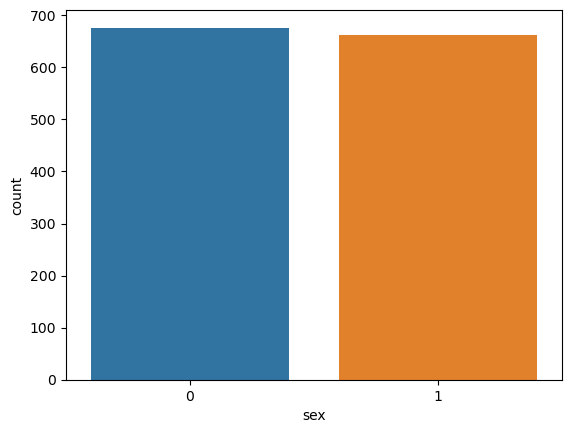

In [16]:
ax=sns.countplot(x='sex',data=df)
df['sex'].value_counts()

region
2    364
3    325
0    325
1    324
Name: count, dtype: int64

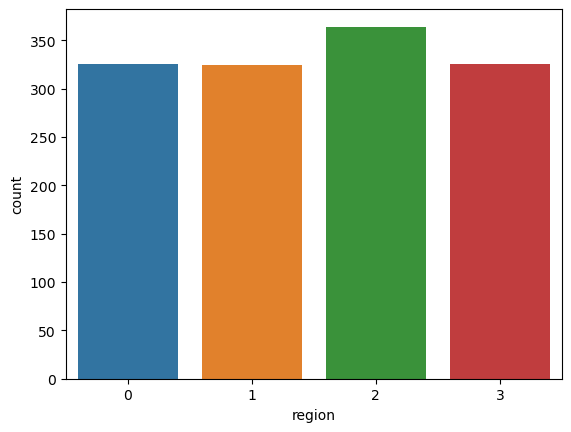

In [17]:
ax=sns.countplot(x='region',data=df)
df['region'].value_counts()

Divide the dataset into features and label

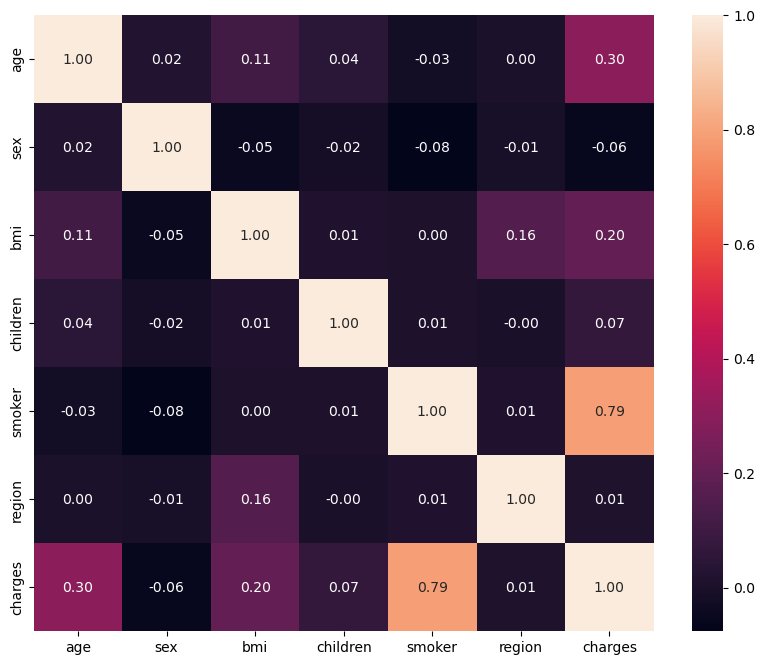

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f",ax=ax)
plt.show()

Smoker, BMI and Age are most important factor that determnines - Charges

Also we see that Sex,Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation



In [19]:

df['region'].value_counts()

region
2    364
3    325
0    325
1    324
Name: count, dtype: int64

In [20]:
df['sex'].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [21]:
df['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

# EDA

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

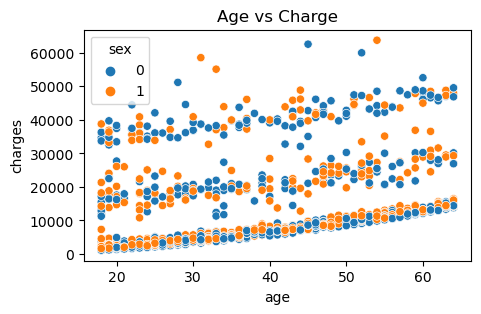

In [22]:
plt.figure(figsize=(5,3))
plt.title('Age vs Charge')
sns.scatterplot(x='age',y='charges',hue='sex',data=df)

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

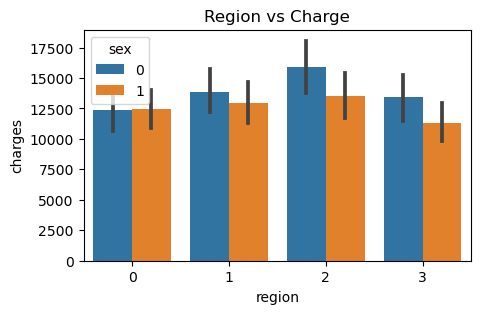

In [23]:
plt.figure(figsize=(5,3))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',hue='sex',data=df)

<Axes: title={'center': 'BMI vs Charge'}, xlabel='bmi', ylabel='charges'>

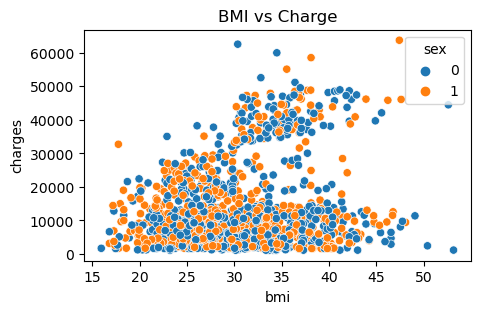

In [24]:
plt.figure(figsize=(5,3))
plt.title('BMI vs Charge')
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df)

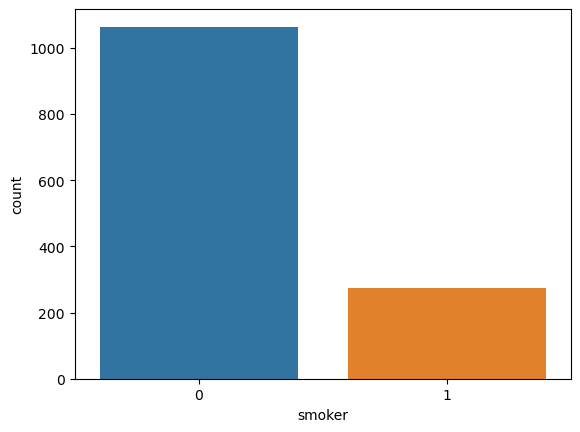

In [25]:
ax=sns.countplot(x='smoker',data=df)

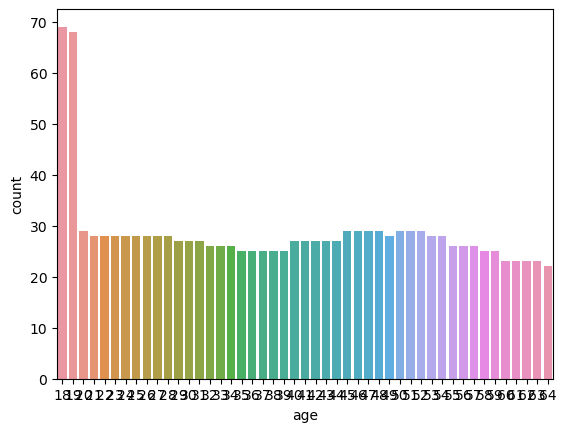

In [26]:
ax=sns.countplot(x='age',data=df)

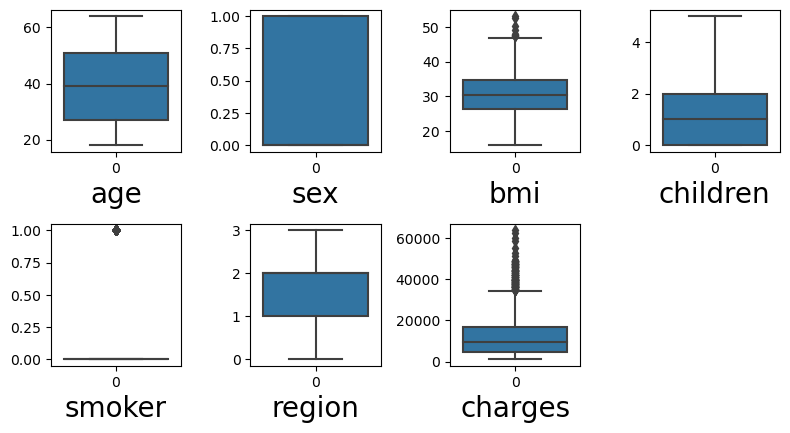

In [27]:
plt.figure(figsize=(8,6))
graph=1
for column in df:
    if graph<13:
        ax=plt.subplot(3,4,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout()

By visualizing the box plot outliers are present in bmi

In [28]:
from scipy.stats import zscore
out_features=df[['bmi','smoker','charges']]
z=np.abs(zscore(out_features))
z

,bmi,smoker,charges
0,0.453320,1.970587,0.298584
1,0.509621,0.507463,0.953689
2,0.383307,0.507463,0.728675
3,1.305531,0.507463,0.719843
4,0.292556,0.507463,0.776802
...,...,...,...
1333,0.050297,0.507463,0.220551
1334,0.206139,0.507463,0.914002
1335,1.014878,0.507463,0.961596
1336,0.797813,0.507463,0.930362


In [29]:
#thresold=3
np.where(z>3)

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
       dtype=int64),
 array([2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0], dtype=int64))

In [30]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1327, 7)

In [31]:
print("old df",df.shape)
print("new df",df1.shape)

old df (1338, 7)
new df (1327, 7)


In [32]:
print("Data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage- 0.8221225710014948


In [33]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


<Axes: xlabel='charges'>

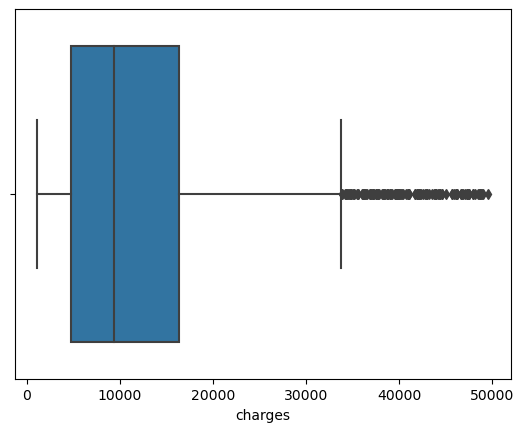

In [34]:
sns.boxplot(x=df1["charges"])

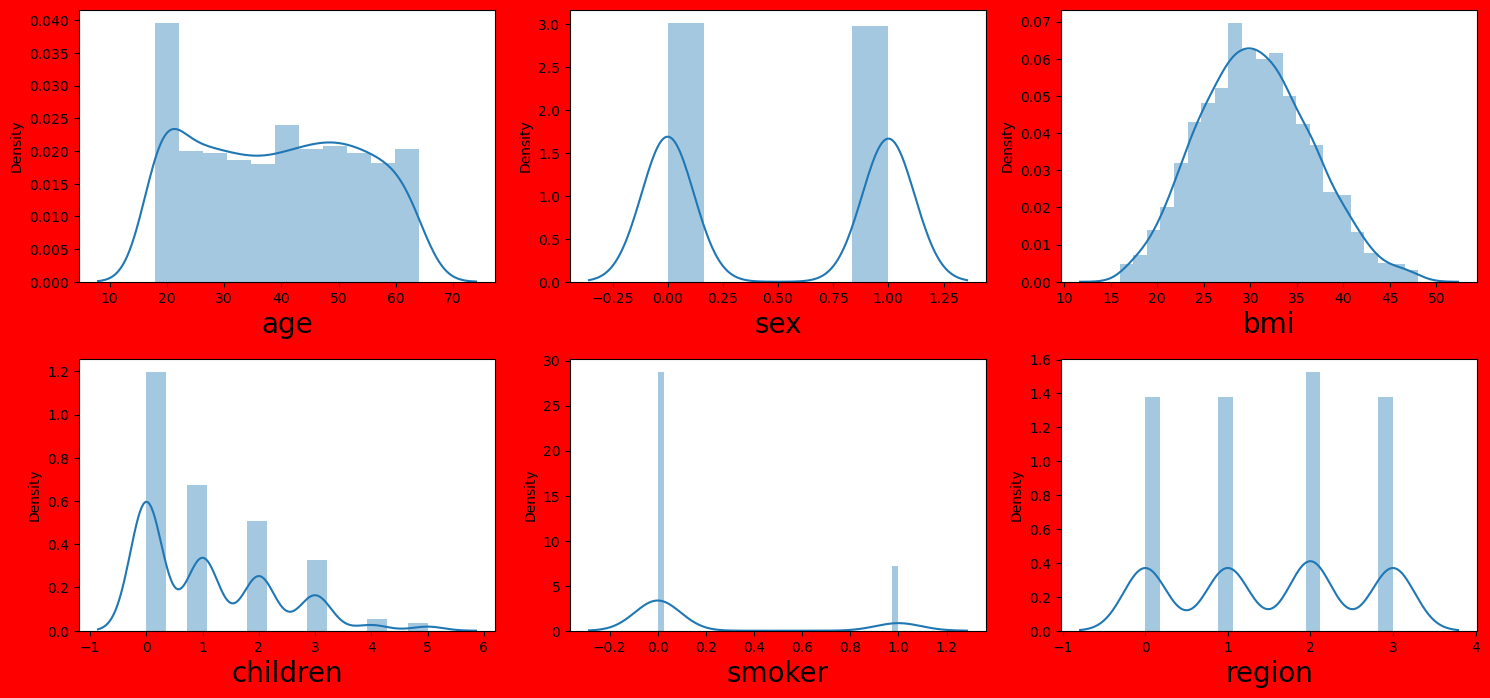

In [35]:
plt.figure(figsize=(15,10),facecolor='red')
plotnumber=1
for column in df1:
    if plotnumber<7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
        plt.tight_layout()


Data is normally distributed

# Checking for skewness

In [36]:
df1.skew()

age         0.055031
sex         0.013580
bmi         0.203726
children    0.933380
smoker      1.498166
region     -0.033371
charges     1.453405
dtype: float64

In [37]:
df1['smoker']=np.cbrt(df1['smoker'])
df1['children']=np.cbrt(df1['children'])


In [38]:
df1.skew()

age         0.055031
sex         0.013580
bmi         0.203726
children   -0.101115
smoker      1.498166
region     -0.033371
charges     1.453405
dtype: float64

In [39]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0.00000,1.0,3,16884.92400
1,18,0,33.770,1.00000,0.0,2,1725.55230
2,28,0,33.000,1.44225,0.0,2,4449.46200
3,33,0,22.705,0.00000,0.0,0,21984.47061
4,32,0,28.880,0.00000,0.0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,1.44225,0.0,0,10600.54830
1334,18,1,31.920,0.00000,0.0,1,2205.98080
1335,18,1,36.850,0.00000,0.0,2,1629.83350
1336,21,1,25.800,0.00000,0.0,3,2007.94500


In [40]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020610,0.117993,0.051882,-0.027158,0.003217,0.307088
sex,0.020610,1.000000,-0.039539,-0.016302,-0.075665,-0.004348,-0.057332
bmi,0.117993,-0.039539,1.000000,0.021980,-0.007974,0.155806,0.189087
children,0.051882,-0.016302,0.021980,1.000000,0.013991,-0.006113,0.081119
smoker,-0.027158,-0.075665,-0.007974,0.013991,1.000000,0.012750,0.784889
region,0.003217,-0.004348,0.155806,-0.006113,0.012750,1.000000,0.011729
charges,0.307088,-0.057332,0.189087,0.081119,0.784889,0.011729,1.000000


# This gives the corelation between features and label.We can visualize by using heatmap

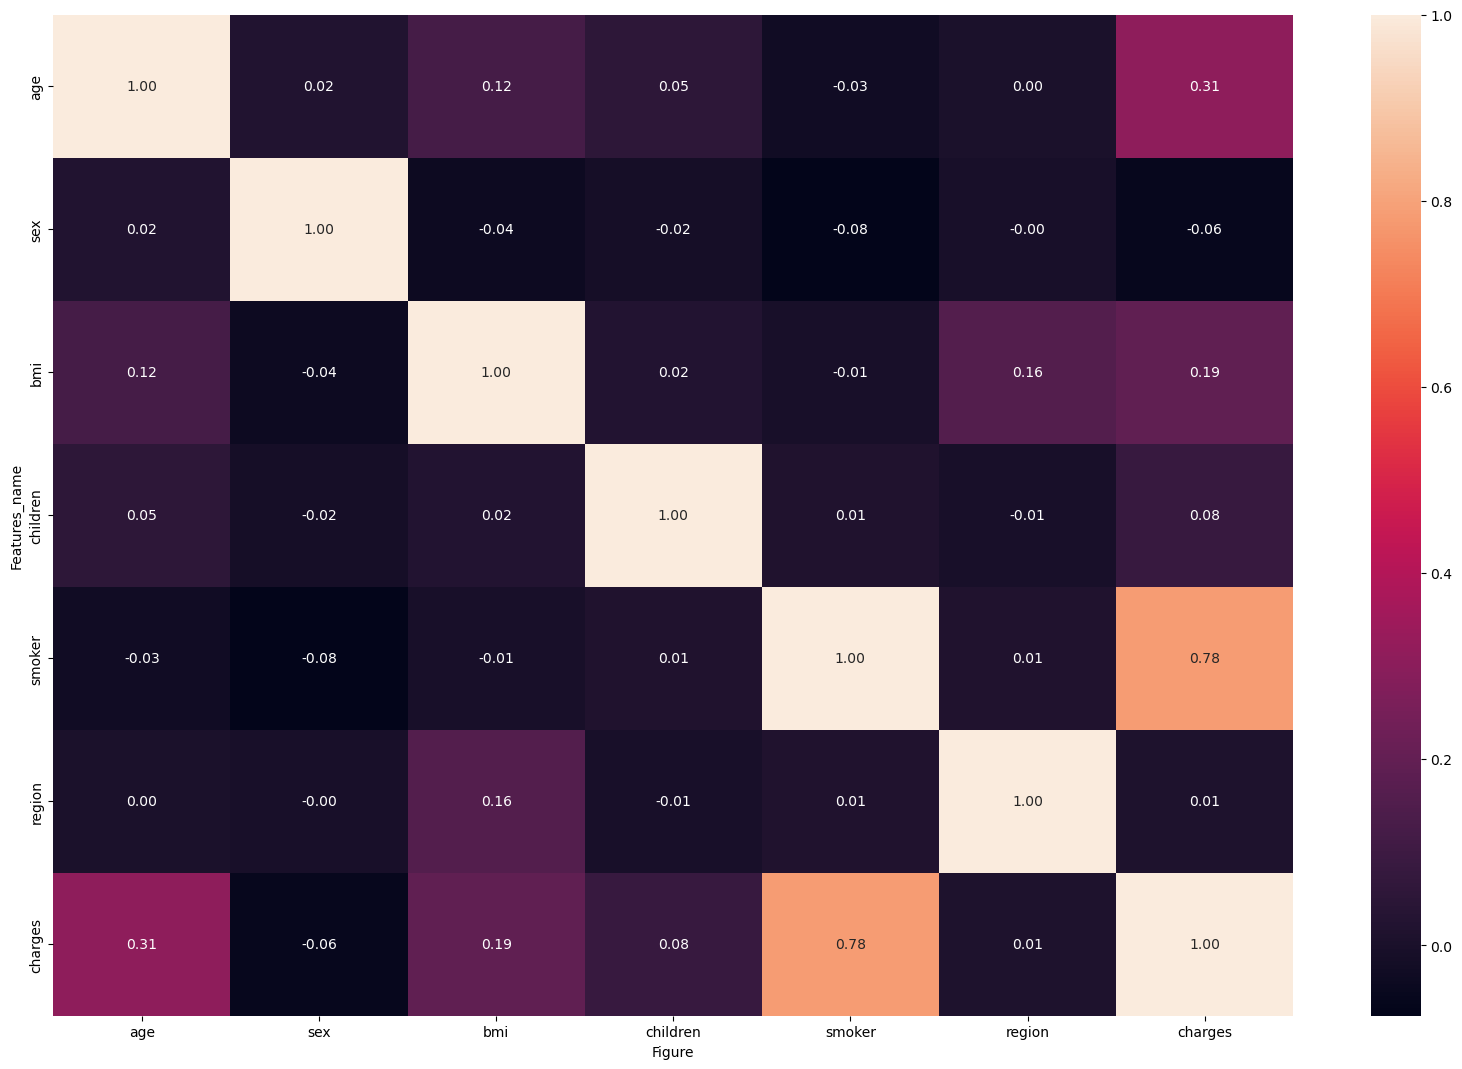

In [41]:
plt.figure(figsize=(20,13))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f')
plt.xlabel("Figure")
plt.ylabel('Features_name')
plt.show()

In [42]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0.00000,1.0,3,16884.92400
1,18,0,33.770,1.00000,0.0,2,1725.55230
2,28,0,33.000,1.44225,0.0,2,4449.46200
3,33,0,22.705,0.00000,0.0,0,21984.47061
4,32,0,28.880,0.00000,0.0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,1.44225,0.0,0,10600.54830
1334,18,1,31.920,0.00000,0.0,1,2205.98080
1335,18,1,36.850,0.00000,0.0,2,1629.83350
1336,21,1,25.800,0.00000,0.0,3,2007.94500


# seperating features and label

In [43]:
x=df1.drop('charges',axis=1)
y=df1['charges']

In [44]:
print(x.shape)
print(y.shape)

(1327, 6)
(1327,)


# Feature scaling using standard scalarization

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439902,1.006805,-0.446000,-1.119802,1.997178,1.344197
1,-1.511141,-0.993241,0.534254,0.499198,-0.500706,0.440117
2,-0.798759,-0.993241,0.405668,1.215200,-0.500706,0.440117
3,-0.442568,-0.993241,-1.313533,-1.119802,-0.500706,-1.368042
4,-0.513806,-0.993241,-0.282346,-1.119802,-0.500706,-1.368042
...,...,...,...,...,...,...
1322,0.768481,-0.993241,0.066671,1.215200,-0.500706,-1.368042
1323,-1.511141,1.006805,0.225315,-1.119802,-0.500706,-0.463963
1324,-1.511141,1.006805,1.048595,-1.119802,-0.500706,0.440117
1325,-1.297426,1.006805,-0.796687,-1.119802,-0.500706,1.344197


# Variance inflation factor

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.018195,age
1,1.008205,sex
2,1.041828,bmi
3,1.003524,children
4,1.006892,smoker
5,1.025414,region


# Finding best random state

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [48]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best r2_score is",maxAccu,"at random state",maxRS)

Best r2_score is 0.7815343981760552 at random state 1
Best r2_score is 0.7935498466416796 at random state 20
Best r2_score is 0.801558053982059 at random state 75


In [49]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge



In [51]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)

Intercept: 13172.105000557722
Coefficients: [3458.72708903   70.20893494 1870.7483787   470.16735469 9116.98992457
 -190.74096398]


In [52]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(lr)
print('R2_score:',r2_score(y_test,pred_lr))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_lr)))


LinearRegression()
R2_score: 0.801558053982059
R2_score on training data: 72.92012322133259
Mean absolute error: 3803.7870390177154
mean squared error: 27026386.610582955
Root mean squared error: 5198.690855454184


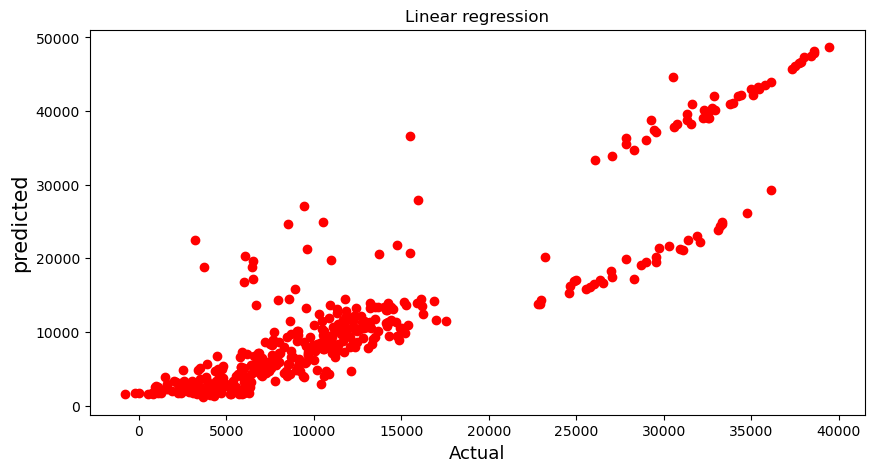

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(x=pred_lr,y=y_test,color='r')
plt.xlabel("Actual",fontsize=13)
plt.ylabel("predicted",fontsize=15)
plt.title("Linear regression")
plt.show()

In [54]:
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y_test,pred_RFR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_RFR))
print("mean squared error:",mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))


RandomForestRegressor()
R2_score: 0.8721782019455724
R2_score on training data: 97.38046248774349
Mean absolute error: 2556.430922426467
mean squared error: 17408422.97105118
Root mean squared error: 4172.340227144855


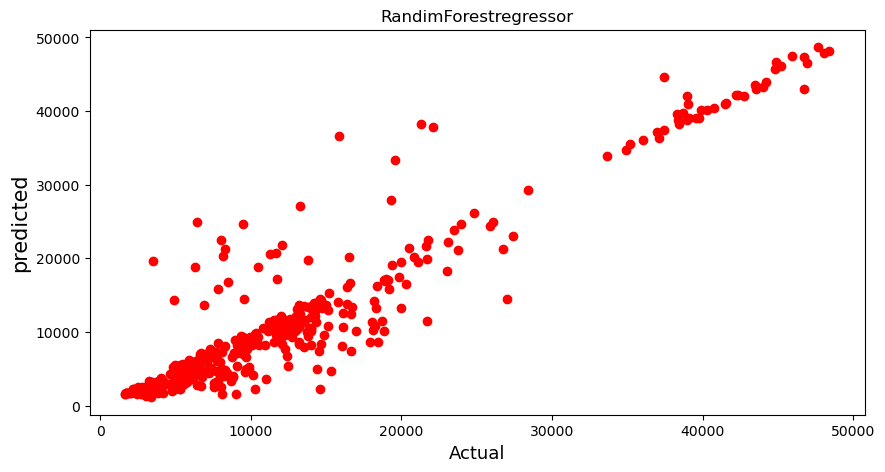

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(x=pred_RFR,y=y_test,color='r')
plt.xlabel("Actual",fontsize=13)
plt.ylabel("predicted",fontsize=15)
plt.title("RandimForestregressor")
plt.show()

In [56]:
knn= KNN()
knn.fit(x_train, y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test,pred_knn))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print("mean squared error:",mean_squared_error(y_test,pred_knn))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_knn)))


KNeighborsRegressor()
R2_score: 0.8296271017745122
R2_score on training data: 84.9242945196496
Mean absolute error: 3129.804491136341
mean squared error: 23203581.23776534
Root mean squared error: 4817.009574182445


In [57]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt=dt.predict(x_test)
pred_train=lr.predict(x_train)
print(dt)
print('R2_score:',r2_score(y_test,pred_dt))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_dt))
print("mean squared error:",mean_squared_error(y_test,pred_dt))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_dt)))


DecisionTreeRegressor()
R2_score: 0.7238902871046587
R2_score on training data: 72.92012322133259
Mean absolute error: 2997.5706643358394
mean squared error: 37604185.99690562
Root mean squared error: 6132.225207614738


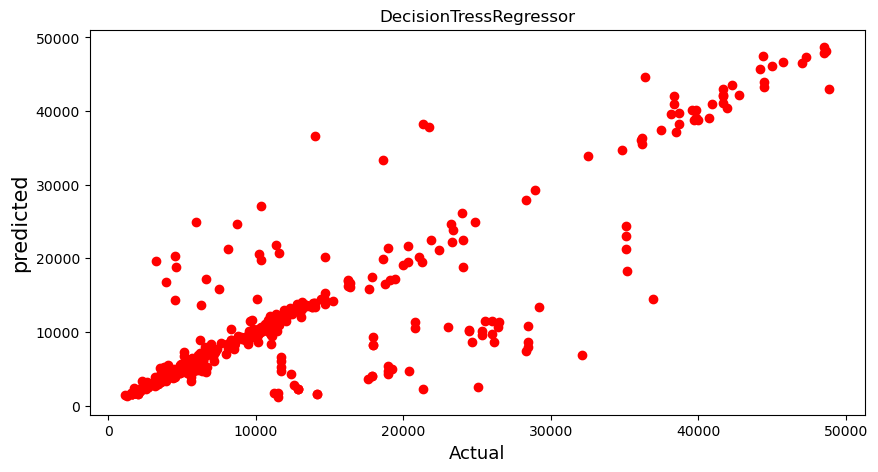

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(x=pred_dt,y=y_test,color='r')
plt.xlabel("Actual",fontsize=13)
plt.ylabel("predicted",fontsize=15)
plt.title("DecisionTressRegressor")
plt.show()

In [59]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print('R2_score:',r2_score(y_test,pred_lasso))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lasso))
print("mean squared error:",mean_squared_error(y_test,pred_lasso))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))


Lasso()
R2_score: 0.8015343712999926
R2_score on training data: 72.92011874057836
Mean absolute error: 3803.9200071094624
mean squared error: 27029612.02403181
Root mean squared error: 5199.001060206837


In [60]:
r= Ridge()
r.fit(x_train, y_train)
pred_r=r.predict(x_test)
pred_train=r.predict(x_train)
print(r)
print('R2_score:',r2_score(y_test,pred_r))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_r))
print("mean squared error:",mean_squared_error(y_test,pred_r))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_r)))


Ridge()
R2_score: 0.8014555306507568
R2_score on training data: 72.92003855316918
Mean absolute error: 3805.710515286477
mean squared error: 27040349.56168266
Root mean squared error: 5200.033611591627


In [61]:
svm = SVR()
svm.fit(x_train, y_train)
pred_svm=svm.predict(x_test)
pred_train=svm.predict(x_train)
print(svm)
print('R2_score:',r2_score(y_test,pred_svm))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_svm))
print("mean squared error:",mean_squared_error(y_test,pred_svm))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_svm)))


SVR()
R2_score: -0.049565474165900625
R2_score on training data: -9.817545529793081
Mean absolute error: 7797.037744273633
mean squared error: 142943378.8931041
Root mean squared error: 11955.893061294255


so Random forest has the highest accuracy

# Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
#cross validation of Random Forest
score=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print("score")
print(score.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_RFR)-score.mean())*100)

score
0.8370019860881784
Diff between r2_score and cross validation- 3.5176215857393944


In [74]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print("score1")
print(score1.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_lr)-score1.mean())*100)

score1
0.7493527486660095
Diff between r2_score and cross validation- 5.22053053160495


In [75]:
score2=cross_val_score(knn,x,y,cv=5,scoring='r2')
print("score2")
print(score2.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_knn)-score2.mean())*100)

score2
0.8064275705846159
Diff between r2_score and cross validation- 2.319953118989626


In [76]:
score3=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print("score3")
print(score3.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_lasso)-score3.mean())*100)

score3
0.7493564354203706
Diff between r2_score and cross validation- 5.2177935879622055


In [77]:
score4=cross_val_score(r,x,y,cv=5,scoring='r2')
print("score4")
print(score4.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_r)-score4.mean())*100)

score4
0.7493554170818773
Diff between r2_score and cross validation- 5.210011356887955


In [78]:
score5=cross_val_score(dt,x,y,cv=5,scoring='r2')
print("score5")
print(score5.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_dt)-score5.mean())*100)

score5
0.7039884367374551
Diff between r2_score and cross validation- 1.99018503672036


In [79]:
score6=cross_val_score(svm,x,y,cv=5,scoring='r2')
print("score6")
print(score6.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_svm)-score6.mean())*100)

score6
-0.09677845993786698
Diff between r2_score and cross validation- 4.721298577196635


# Hyperparameter tuning

In [81]:
from sklearn.model_selection import RandomizedSearchCV
params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
             

In [85]:
random=RandomizedSearchCV(RandomForestRegressor(),params,cv=5)
random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [86]:
random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [89]:
Final_model=RandomForestRegressor(bootstrap=False,max_depth=30,max_features='sqrt',min_samples_leaf=4,min_samples_split=5,n_estimators=1600)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)

print('r2_score:',r2_score(y_test,pred)*100)



r2_score: 88.46170517793765


In [91]:
import joblib
import pickle
fname="Medical Cost Personal Insurance.pkl"

In [92]:
pickle.dump(Final_model,open(fname,'wb'))


In [93]:
loaded_model=pickle.load(open('Medical Cost Personal Insurance.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

88.46170517793765


In [94]:
Result=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","origional"])
Result

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
predicted,7067.790122,6341.263276,6407.848418,16029.89098,5733.931556,13704.62961,6838.21559,12482.394938,34646.301561,15929.871035,...,9914.393601,5312.896168,11611.576631,8975.125847,13843.020847,41996.129822,34737.117572,12582.304119,12815.128568,18617.457699
origional,18838.703660,2217.601200,4670.640000,11289.10925,4751.070000,13019.16105,4402.23300,12475.351300,34672.147200,36580.282160,...,8428.069300,14358.364370,9566.990900,24603.048370,13143.864850,47305.305000,37133.898200,9504.310300,11353.227600,14474.675000
